In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
try:
    df = pd.read_csv('data/gender.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file berada di direktori yang sama atau telah diunggah.")
    exit()

Dataset berhasil dimuat.


In [7]:
df.head(100)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,14.6,5.6,1,0,1,1,Male
1,1,15.4,5.2,1,1,1,1,Male
2,1,14.6,6.1,0,0,1,1,Male
3,0,13.4,6.5,1,1,1,1,Male
4,1,13.8,6.3,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
95,1,11.8,5.7,1,1,1,1,Male
96,1,12.0,5.5,0,1,0,0,Female
97,1,12.2,6.0,1,1,1,1,Male
98,1,14.3,6.4,1,1,1,1,Male


In [6]:
print(df.columns)


Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [5]:
print("Contoh Data:")
print(df.head())
print("\nDistribusi Kelas:")
print(df['gender'].value_counts())

Contoh Data:
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               14.6                 5.6          1          0   
1          1               15.4                 5.2          1          1   
2          1               14.6                 6.1          0          0   
3          0               13.4                 6.5          1          1   
4          1               13.8                 6.3          1          1   

   lips_thin  distance_nose_to_lip_long gender  
0          1                          1   Male  
1          1                          1   Male  
2          1                          1   Male  
3          1                          1   Male  
4          1                          1   Male  

Distribusi Kelas:
gender
Male      1750
Female    1750
Name: count, dtype: int64


In [6]:
X = df.drop('gender', axis=1)
y = df['gender']

In [16]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")
print("-" * 35)

Ukuran data latih: (2450, 7)
Ukuran data uji: (1050, 7)
-----------------------------------


In [9]:
models = {
    "Logistic Regression": LogisticRegression(), #LogisticRegression(max_iter=200)
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(), #KNeighborsClassifier(n_neighbors=5)
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [10]:
predictions = {}

In [11]:
for name, model in models.items():
    print(f"Melatih model {name}...")
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    print(f"Model {name} selesai dilatih.")

print("-" * 35)

Melatih model Logistic Regression...
Model Logistic Regression selesai dilatih.
Melatih model K-Nearest Neighbors (KNN)...
Model K-Nearest Neighbors (KNN) selesai dilatih.
Melatih model Gaussian Naive Bayes...
Model Gaussian Naive Bayes selesai dilatih.
Melatih model Bernoulli Naive Bayes...
Model Bernoulli Naive Bayes selesai dilatih.
Melatih model Multinomial Naive Bayes...
Model Multinomial Naive Bayes selesai dilatih.
Melatih model Decision Tree...
Model Decision Tree selesai dilatih.
-----------------------------------


In [12]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

In [13]:
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results_df.loc[len(results_df)] = [name, accuracy, precision, recall, f1]

In [14]:
print("Tabel Hasil Evaluasi Model:")
print(results_df.to_string(index=False))
print("-" * 70)

Tabel Hasil Evaluasi Model:
                    Model  Accuracy  Precision   Recall  F1-score
      Logistic Regression  0.968571   0.968777 0.968571  0.968568
K-Nearest Neighbors (KNN)  0.963810   0.964241 0.963810  0.963801
     Gaussian Naive Bayes  0.972381   0.972671 0.972381  0.972377
    Bernoulli Naive Bayes  0.963810   0.964781 0.963810  0.963791
  Multinomial Naive Bayes  0.959048   0.961097 0.959048  0.959002
            Decision Tree  0.962857   0.963235 0.962857  0.962850
----------------------------------------------------------------------


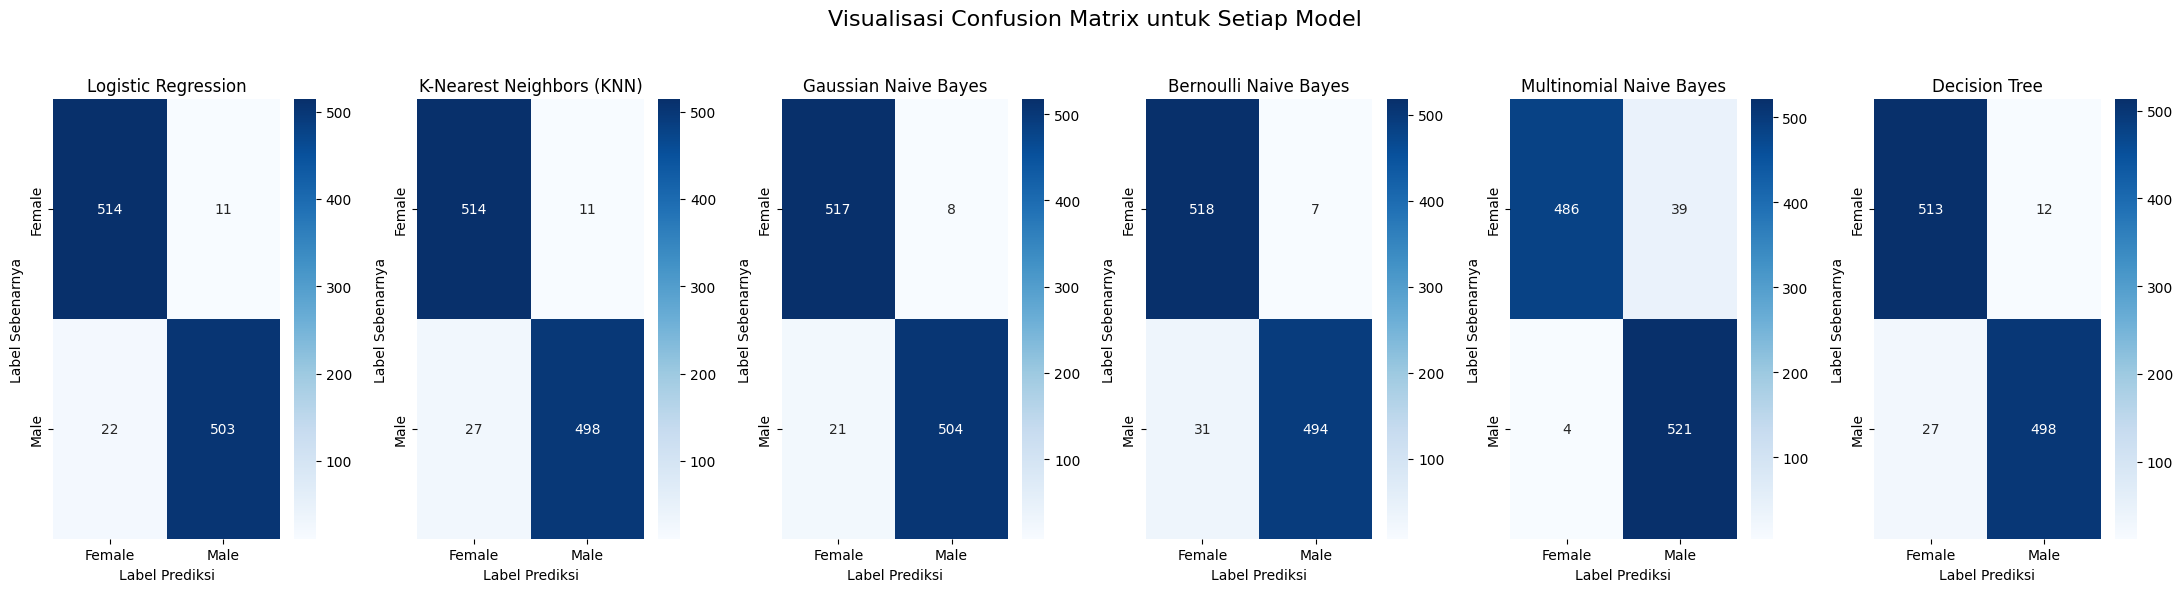

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(22, 6))
fig.suptitle('Visualisasi Confusion Matrix untuk Setiap Model', fontsize=16)

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=class_names, yticklabels=class_names)

    axes[i].set_title(name)
    axes[i].set_xlabel('Label Prediksi')
    axes[i].set_ylabel('Label Sebenarnya')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()